# Prediction of epidemic trends in Covid-9 with logistic model and Machine learning technics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [24]:
df = pd.read_csv("covid19_india - covid_19_india.csv")
df.shape
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,total
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,0.0
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,0.0
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,0.0
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,0.0
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...
8481,8482,16/11/20,8:00 AM,Telengana,-,-,242084,1407,257876,1.0
8482,8483,16/11/20,8:00 AM,Tripura,-,-,30555,364,31962,1.0
8483,8484,16/11/20,8:00 AM,Uttarakhand,-,-,62543,1107,68215,1.0
8484,8485,16/11/20,8:00 AM,Uttar Pradesh,-,-,480965,7372,511304,1.0


In [25]:
df.describe()

,Sno,Cured,Deaths,Confirmed,total
count,8486.000000,8.486000e+03,8486.000000,8.486000e+03,8478.000000
mean,4243.500000,6.233974e+04,1259.756776,7.526006e+04,0.298419
std,2449.841525,1.631783e+05,4185.666015,1.886263e+05,0.457591
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2122.250000,8.500000e+01,2.000000,3.762500e+02,0.000000
50%,4243.500000,3.174000e+03,50.000000,4.903000e+03,0.000000
75%,6364.750000,3.908250e+04,712.500000,5.543175e+04,1.000000
max,8486.000000,1.615379e+06,45974.000000,1.747242e+06,1.000000


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le_Date = LabelEncoder()


In [28]:
df['Date_n'] = le_Date.fit_transform(df['Date'])
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,total,Date_n
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1,0.0,277
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1,0.0,286
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2,0.0,0
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3,0.0,10
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3,0.0,20


In [29]:
d = df.drop(['Time','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'], axis='columns')
d

,Sno,Date,State/UnionTerritory,Confirmed,total,Date_n
0,1,30/01/20,Kerala,1,0.0,277
1,2,31/01/20,Kerala,1,0.0,286
2,3,01/02/20,Kerala,2,0.0,0
3,4,02/02/20,Kerala,3,0.0,10
4,5,03/02/20,Kerala,3,0.0,20
...,...,...,...,...,...,...
8481,8482,16/11/20,Telengana,257876,1.0,159
8482,8483,16/11/20,Tripura,31962,1.0,159
8483,8484,16/11/20,Uttarakhand,68215,1.0,159
8484,8485,16/11/20,Uttar Pradesh,511304,1.0,159


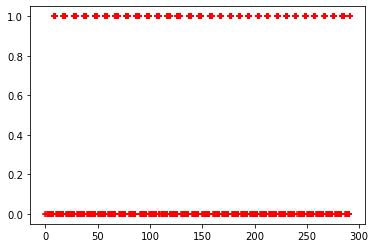

In [30]:
plt.scatter(d.Date_n, d.total ,marker='+', color='red')

In [49]:
# d.shape
# d = d.dropna()

# import numpy as np
# np.any(np.isnan(d))
# np.all(np.isfinite(d))

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(d[['Date_n']],d.total,test_size=0.2)

In [52]:
X_test

,Date_n
7333,148
3327,218
7134,88
6256,137
3709,25
...,...
2366,253
3593,281
2859,94
458,269


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model = LogisticRegression()

In [55]:
model.fit(X_train, Y_train)

LogisticRegression()

In [56]:
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
model.score(X_test, Y_test)

0.6981132075471698

In [58]:
model.predict_proba(X_test)

array([[0.7025057 , 0.2974943 ],
       [0.71145587, 0.28854413],
       [0.69470822, 0.30529178],
       ...,
       [0.69549312, 0.30450688],
       [0.71787489, 0.28212511],
       [0.7176248 , 0.2823752 ]])

In [61]:
Y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_predicted)
cm

array([[1184,    0],
       [ 512,    0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

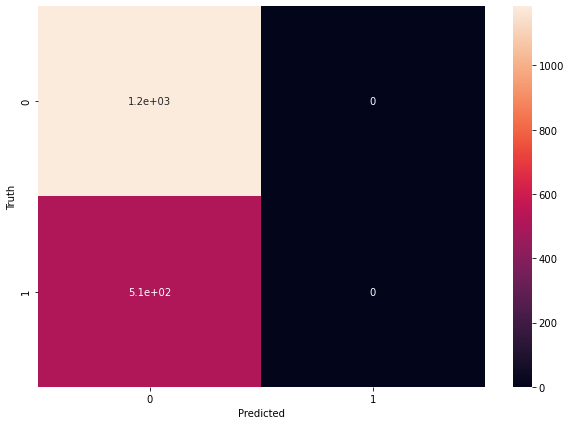

In [62]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')